In [104]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

 Time Complexity O(N*P*t)
 N : number of instances
 P : number of features in a row
 t : number of iterations
 Spatial Complexity O(N*P)
 P:number of features

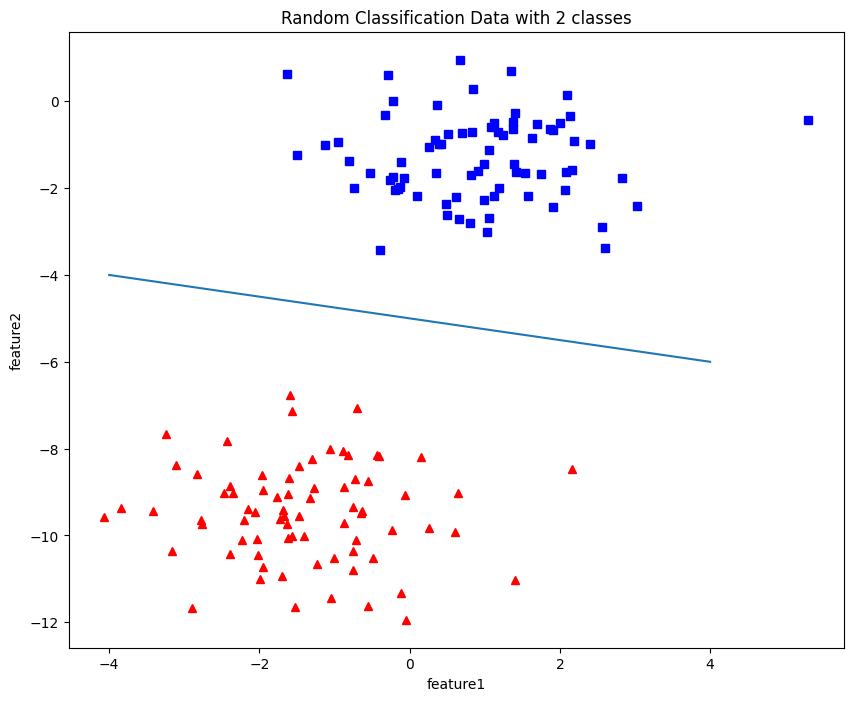

In [106]:

X,y=datasets.make_blobs(n_samples=150,n_features=2,
                        centers=2,cluster_std=1.05,random_state=2)
#plotting
fig=plt.figure(figsize=(10,8))
plt.plot(X[:,0][y==0],X[:,1][y==0],'r^')
plt.plot(X[:,0][y==1],X[:,1][y==1],'bs')
plt.plot([-4,4],[-4,-6])
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.title("Random Classification Data with 2 classes")
plt.show()

In [13]:
#Activation Fucntion Heaviside
def acti_func(x):
    if(x>0):
        return 1
    return 0

In [14]:
def perceptron(X,y,lr,epochs):
    # X --> Inputs.
    # y --> labels/target.
    # lr --> learning rate.
    # epochs --> Number of iterations.
    # m-> number of training examples
    # n-> number of features
    m, n = X.shape
    # Initializing parameters(theta) to zeros.
    # +1 in n+1 for the bias term.
    w = np.zeros((n+1,1))
    # Empty list to store how many examples were
    # misclassified at every iteration.
    n_miss_list = []
    # Training.
    for epoch in range(epochs):
    # variable to store misclassified.
        n_miss = 0
        # looping for every example.
        for idx, x_i in enumerate(X):
            # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            # Calculating prediction/hypothesis.
            y_hat = acti_func(np.dot(x_i.T, w))
            # Updating if the example is misclassified.
            if (np.squeeze(y_hat) - y[idx]) != 0:
                w=w+lr*(y[idx]-y_hat)*x_i
                n_miss+=1

    # Appending number of misclassified examples
    # at every iteration.
        n_miss_list.append(n_miss)
    return w, n_miss_list


In [15]:
def plot_decision_boundary(X, w):
    # X --> Inputs
    # w --> parameters
    # The Line is y=mx+c
    # So, Equate mx+c = w0.X0 + w1.X1 + w2.X2
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[1]/w[2]
    c = -w[0]/w[2]
    x2 = m*np.array(x1) + c
    #plotting
    plt.figure()

    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.plot(x1, x2)
    plt.ylim([min(X[:, 1]), max(X[:, 1])])
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Perceptron Decision Boundary')
    plt.show()

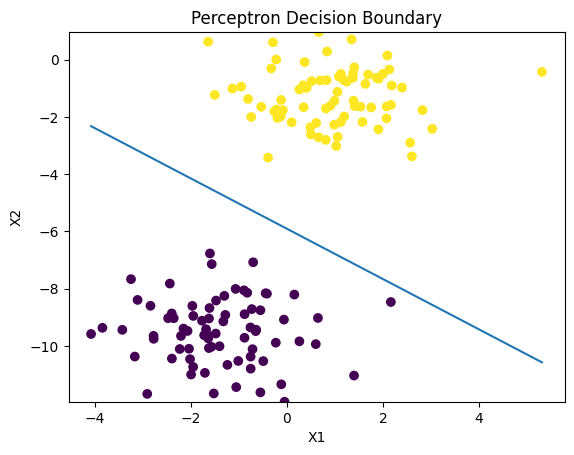

In [16]:
# Train perceptron
w, _ = perceptron(X, y, lr=0.01, epochs=100)
# Plot decision boundary
plot_decision_boundary(X, w)


### Use the predifined Perceptron from Sklearn

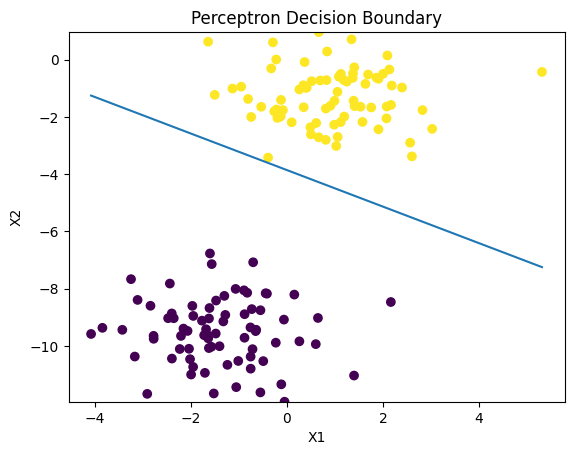

In [107]:
sk_perceptron=Perceptron(tol=1e-3,random_state=42)
sk_perceptron.fit(X,y)
#Extract model weights
w = np.zeros((3, 1))
w[0] = sk_perceptron.intercept_
w[1:] = sk_perceptron.coef_.T
#plot the decision boundary
plot_decision_boundary(X, w)


## Exercice 2

In [109]:


def generate_data_set(sigma1 , sigma2) :
    #Definition des parametres des distributions gaussiennes
    mu1 = np.array([-1, 0])
    mu2 = np.array([1, 0])

    #Generation des données pour les deux classes
    class1_data = np.random.normal(mu1, sigma1, size=(125,2))
    class2_data = np.random.normal(mu2, sigma2, size=(125,2))

    #Création des étiquettes de classe
    class1_labels = np.full((125,), -1)
    class2_labels = np.full((125,), 0)

    #Fusionner les données et les étiquettes
    X = np.vstack((class1_data, class2_data))
    y = np.hstack((class1_labels, class2_labels))

    #Melanger les données
    X, y = shuffle(X, y, random_state=42)

    #Diviser les données en ensemble de train et test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

In [110]:
def plot_decision_boundary_2(X, w,y):
    x1 = [min(X[:, 0]), max(X[:, 0])]
    m = -w[1] / w[2]
    c = -w[0] / w[2]
    x2 = m * np.array(x1) + c

    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.plot(x1, x2)
    # ax.ylim([min(X[:, 1]), max(X[:, 1])])
    plt.xlabel('X1')
    plt.ylabel('X2')

In [111]:

def experience(sigma):
  #generate the dataset
  X_train, X_test, y_train, y_test = generate_data_set(sigma,sigma)

  #define and train th perceptron
  model = Perceptron(tol=1e-3, random_state=42)
  model.fit(X_train, y_train)

  #Extract weights
  w = np.zeros((3, 1))
  w[0] = model.intercept_
  w[1:] = model.coef_.T

  #calculate the accuracy
  train_accuracy = accuracy_score(y_train, model.predict(X_train))
  test_accuracy = accuracy_score(y_test, model.predict(X_test))

  # Plot the decision boundary for the training set
  plt.figure()
  plot_decision_boundary_2(X_train, w, y_train)
  plt.title(f'Training Set Decision Boundary (sigma={sigma}, accuracy={train_accuracy:.2f})')
  plt.show()

  # Plot the decision boundary for the test set
  plt.figure()
  plot_decision_boundary_2(X_test, w, y_test)
  plt.title(f'Test Set Decision Boundary (sigma={sigma}, accuracy={test_accuracy:.2f})')
  plt.show()


### Experience 1

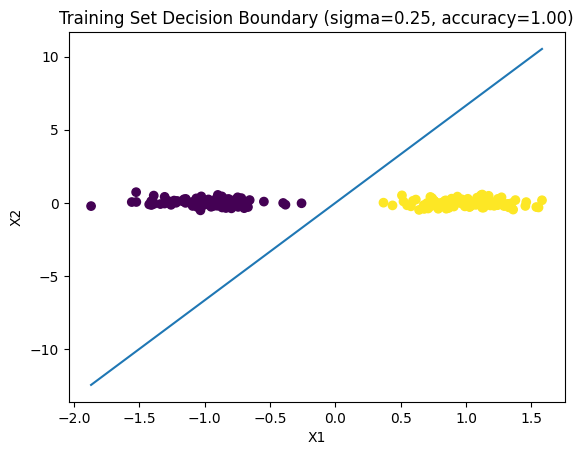

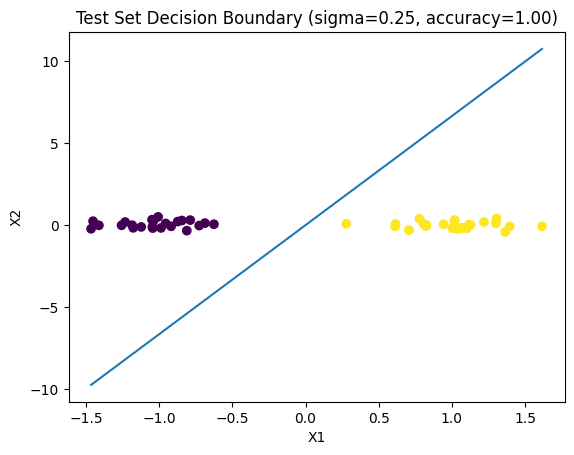

In [112]:
experience(0.25)

### Experience 2

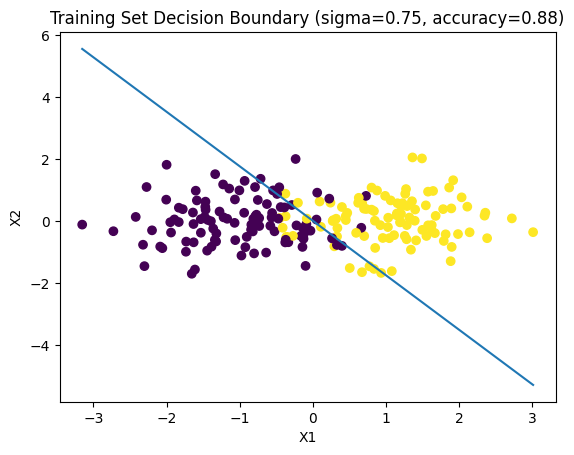

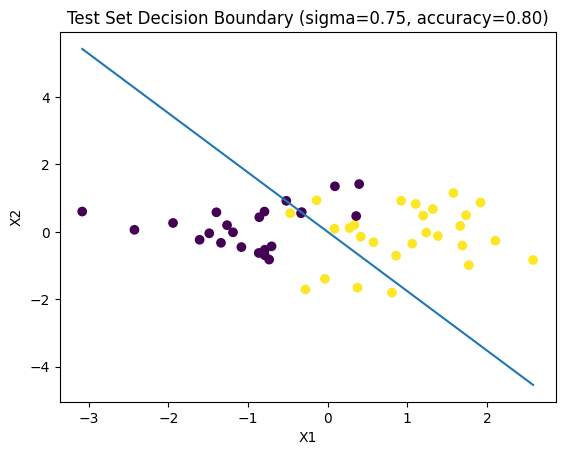

In [113]:
experience(0.75)

### Experience 3

In [114]:
def experiment_3(sigmas, n_experiments=30):
    mean_errors = []
    var_errors = []

    for sigma in sigmas:
        errors = []
        for i in range(n_experiments):
            X_train, X_test, y_train, y_test = generate_data_set(sigma,sigma)
            model = Perceptron(tol=1e-3, random_state=42)
            model.fit(X_train, y_train)

            test_error = 1 - accuracy_score(y_test, model.predict(X_test))
            errors.append(test_error)

        mean_errors.append(np.mean(errors))
        var_errors.append(np.var(errors))

    return mean_errors, var_errors


[0.0, 0.0, 0.0, 0.028000000000000025, 0.13933333333333336]
[0.0, 0.0, 0.0, 0.00041600000000000073, 0.004492888888888889]


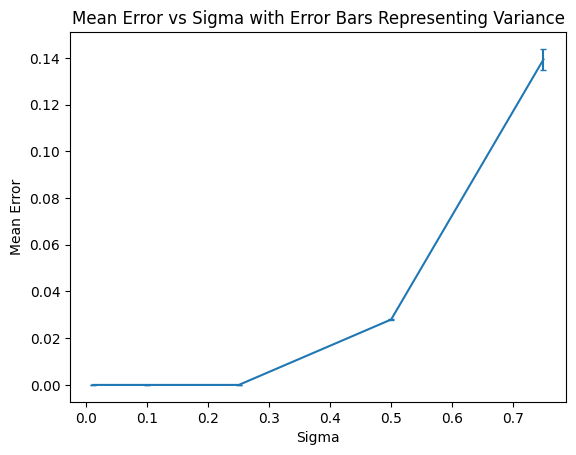

In [133]:
sigmas = [0.01, 0.1,0.25, 0.5, 0.75]
mean_errors, var_errors = experiment_3(sigmas)
print(mean_errors)
print(var_errors)

plt.plot(sigmas, mean_errors, linestyle='-')
plt.errorbar(sigmas, mean_errors, yerr=var_errors,fmt='none', capsize=2)
plt.xlabel('Sigma')
plt.ylabel('Mean Error')
plt.title('Mean Error vs Sigma with Error Bars Representing Variance')
plt.show()

 Comments:

as the sigma values increase, the degree of overlap between the classes increases, making the classification task more challenging for the Perceptron classifier. This is reflected in the increasing mean error and variance as the sigma values increase.